#**Importing Tools**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

Loading Data

In [2]:
# Loading the dataset
file_path = "/content/sample_data/customer.csv"
file_path = "/content/sample_data/purchase.csv"

df_c= pd.read_csv(file_path)
df_p = pd.read_csv(file_path)

In [3]:
# Viewing first few rows
df_c.head()

,order_id,customer_id,product_name,description,price,discount,tax,order_date,quantity,shipping_cost,shipping_date
0,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,29-05-2020
1,ODSHP00002,CS00002,Dress,Look and feel your best with this elegant dress.,28.90,0.05,0.02,29-12-2022,9,13.95,29-12-2022
2,ODSHP00003,CS00003,Furniture,Transform your space with this stylish and fun...,3536.49,0.21,0.04,06-03-2021,3,36.42,06-03-2021
3,ODSHP00004,CS00004,Shoes,Step out in style with these fashionable shoes.,97.80,0.11,0.08,11-03-2020,7,9.35,13-03-2020
4,ODSHP00005,CS00005,Rugs,Add warmth and texture to your floors with the...,1785.38,0.13,0.00,12-03-2022,7,8.55,15-03-2022


Data_Merging

In [4]:
# Merging the datasets on 'customer_id'
merged_data = pd.merge(df_c, df_p, on='customer_id', how='inner')

# Display the first few rows of the merged dataset to verify
merged_data_head = merged_data.head()
merged_data_head


,order_id_x,customer_id,product_name_x,description_x,price_x,discount_x,tax_x,order_date_x,quantity_x,shipping_cost_x,...,order_id_y,product_name_y,description_y,price_y,discount_y,tax_y,order_date_y,quantity_y,shipping_cost_y,shipping_date_y
0,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,...,ODSHP00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,29-05-2020
1,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,...,ODSHP01001,Jeans,Make a statement with these stylish and durabl...,251.69,0.18,0.02,01-09-2019,8,21.67,04-09-2019
2,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,...,ODSHP02001,Wireless Speaker,Stream your favorite music wirelessly with thi...,1711.04,0.48,0.03,24-04-2022,8,45.72,01-05-2022
3,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,...,ODSHP03001,Jacket,Stay warm and fashionable with this trendy jac...,110.61,0.28,0.06,04-01-2020,9,48.17,10-01-2020
4,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,...,ODSHP04001,Sweater,Keep cozy and stylish with this soft and warm ...,135.52,0.32,0.06,10-10-2020,2,10.79,11-10-2020


In [5]:
#getting to understad the data set
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   order_id_x       object 
 1   customer_id      object 
 2   product_name_x   object 
 3   description_x    object 
 4   price_x          float64
 5   discount_x       float64
 6   tax_x            float64
 7   order_date_x     object 
 8   quantity_x       int64  
 9   shipping_cost_x  float64
 10  shipping_date_x  object 
 11  order_id_y       object 
 12  product_name_y   object 
 13  description_y    object 
 14  price_y          float64
 15  discount_y       float64
 16  tax_y            float64
 17  order_date_y     object 
 18  quantity_y       int64  
 19  shipping_cost_y  float64
 20  shipping_date_y  object 
dtypes: float64(8), int64(2), object(11)
memory usage: 400.5+ MB


#**Data_Cleaning**

In [6]:
# Check for missing values in each column
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [7]:
#ckeaking for duplicates
merged_data.duplicated().sum()

0

#**KPI and Insight Development**

**Key Performance Indicators (KPIs)**

In [8]:
#Cal_of_customer_lifetime_value
# Calculating the total purchase value per order after applying discount and tax
merged_data['total_order_value'] = (merged_data['price_y'] + merged_data['price_x']) * (merged_data['quantity_y'] + merged_data['quantity_x']) * (1 - (merged_data['discount_y'] + merged_data['discount_x']) + (merged_data['tax_y'] + merged_data['tax_x']))

# Calculate Customer Lifetime Value (CLV) by summing total_order_value per customer
clv_data = merged_data.groupby('customer_id')['total_order_value'].sum().reset_index()
clv_data.rename(columns={'total_order_value': 'CLV'}, inplace=True)

# Display the first few rows of the CLV data
clv_data.head()

,customer_id,CLV
0,CS00001,4.146906e+07
1,CS00002,4.286703e+07
2,CS00003,5.369335e+07
3,CS00004,2.568839e+07
4,CS00005,4.998182e+07


calculating Average Order Value(Avo)

In [9]:
# Step 1: Calculate Total Revenue and Total Number of Orders
total_revenue = merged_data['total_order_value'].sum()
total_orders = merged_data['order_id_x'].nunique()  # Counting unique orders

# Average Order Value (AOV) calculation
aov = total_revenue / total_orders

# Step 2: Calculate Purchase Frequency
# Count the number of purchases per customer and calculate the average
purchase_frequency = merged_data.groupby('customer_id')['order_id_x'].nunique().mean()

print("Average Order Value (AOV):", aov)
print("purchase_frequency:", purchase_frequency)


Average Order Value (AOV): 845171.7637050686
purchase_frequency: 50.0


**Visualizetioins**

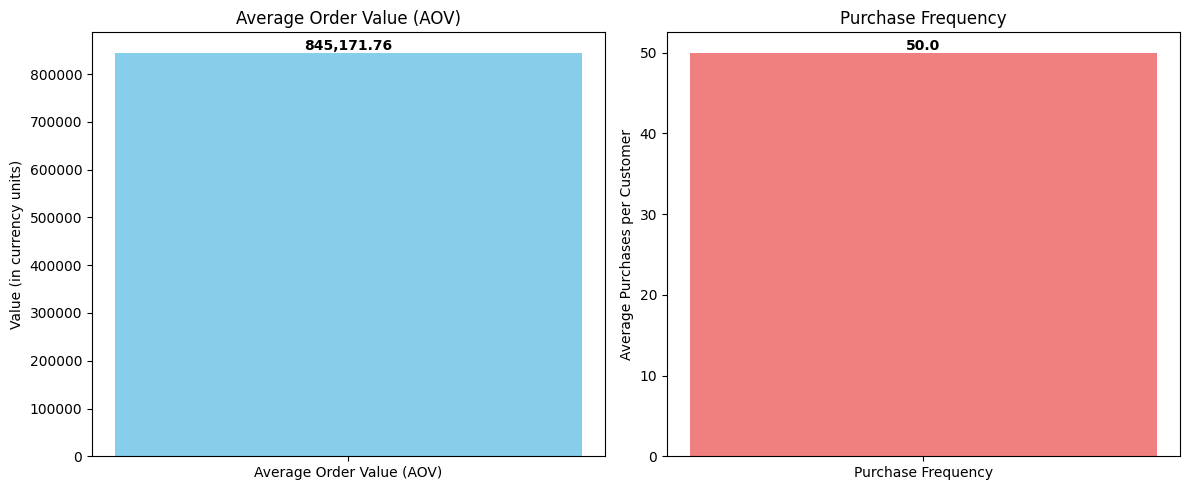

In [26]:
# Results from calculations
aov = 845171.76
purchase_frequency = 50.0

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 1. Bar Chart for Average Order Value (AOV)
ax[0].bar(['Average Order Value (AOV)'], [aov], color='skyblue')
ax[0].set_title('Average Order Value (AOV)')
ax[0].set_ylabel('Value (in currency units)')
ax[0].text(0, aov, f"{aov:,.2f}", ha='center', va='bottom', fontweight='bold')

# 2. Bar or Gauge Chart for Purchase Frequency
ax[1].bar(['Purchase Frequency'], [purchase_frequency], color='lightcoral')
ax[1].set_title('Purchase Frequency')
ax[1].set_ylabel('Average Purchases per Customer')
ax[1].text(0, purchase_frequency, f"{purchase_frequency:.1f}", ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


#**Interpreting AVO & Purchase_Frequency**

- Avo represents the average revenue generated per order across all customers therefore if its this high as 845,171.76 it suggets that each order contributs significanly to total revenue. Meaning customers are buying a lot

-- Purchase Frequency of 50.0 indicats that on average each customer makes 50 purchases within the observed timeframe. this means there is strong customer ingagement.


#**Interpretation**
- Interpretation:
For AOV:
Compare it against industry standards or past AOVs for your business to see if it’s high or low.
If AOV is significantly high, investigate if there are specific products or categories driving it.
For Purchase Frequency:
If the frequency is higher than expected, it may point to high customer retention.
Identify the reasons driving repeat purchases (e.g., subscription model, popular product categories).

- Tracking these KPIs over time and segmenting them by customer demographics or purchase categories can offer even deeper insights into customer behavior and areas for potential growth

#**Customer Segments Insights**

**Creating Demographics and Bhavioral Segments**

In [10]:
# Create age segments
#merged_data['age_group'] = pd.cut(merged_data['age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '61+'])

# Create frequency segments based on purchase frequency calculated previously
# Define custom thresholds (e.g., Low: <20, Medium: 20-50, High: >50 purchases)
merged_data['frequency_segment'] = pd.cut(
    merged_data.groupby('customer_id')['order_id_x'].transform('nunique'),
    bins=[0, 20, 50, float('inf')], labels=['Low', 'Medium', 'High']
)

# Calculate CLV segments based on quantiles (e.g., Top 25% as high-value)
clv_data['CLV_segment'] = pd.qcut(clv_data['CLV'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Merge CLV segments back to main data
merged_data = merged_data.merge(clv_data[['customer_id', 'CLV_segment']], on='customer_id', how='left')


Identifying high_value_segments

In [11]:
# Revenue by age group and frequency segment
age_freq_revenue = merged_data.groupby(['frequency_segment'])['total_order_value'].sum().reset_index()

# Revenue by CLV segment
clv_segment_revenue = merged_data.groupby('CLV_segment')['total_order_value'].sum().reset_index()

print("Revenue by Age Group and Frequency Segment:")
print(age_freq_revenue)

print("\nRevenue by CLV Segment:")
print(clv_segment_revenue)


Revenue by Age Group and Frequency Segment:
  frequency_segment  total_order_value
0               Low       0.000000e+00
1            Medium       4.225859e+10
2              High       0.000000e+00

Revenue by CLV Segment:
  CLV_segment  total_order_value
0         Low       8.165555e+09
1      Medium       9.822901e+09
2        High       1.110303e+10
3   Very High       1.316710e+10


#**High_Value_Segments_visualisation**

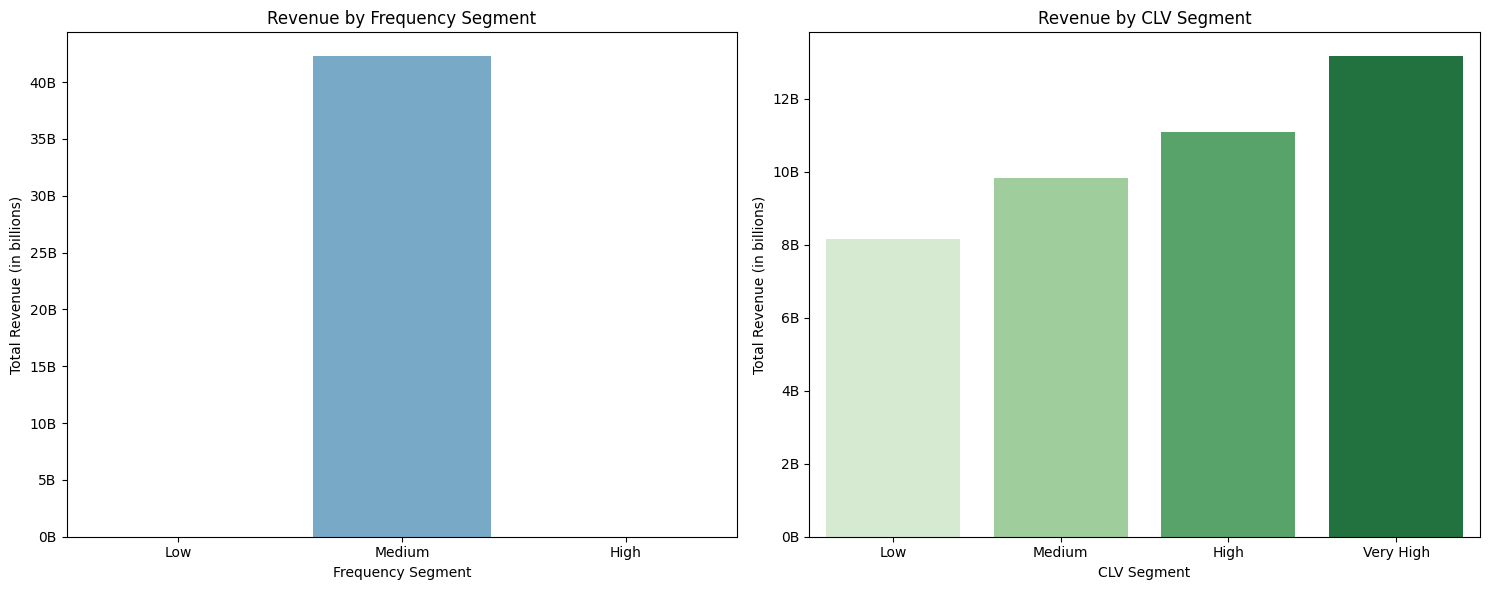

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up data for the visuals based on user-provided results
# Revenue by Frequency Segment
frequency_segment_data = {
    'frequency_segment': ['Low', 'Medium', 'High'],
    'total_order_value': [0.0, 4.225859e+10, 0.0]
}
frequency_segment_df = pd.DataFrame(frequency_segment_data)

# Revenue by CLV Segment
clv_segment_data = {
    'CLV_segment': ['Low', 'Medium', 'High', 'Very High'],
    'total_order_value': [8.165555e+09, 9.822901e+09, 1.110303e+10, 1.316710e+10]
}
clv_segment_df = pd.DataFrame(clv_segment_data)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for Revenue by Frequency Segment
sns.barplot(data=frequency_segment_df, x='frequency_segment', y='total_order_value', palette='Blues', ax=ax1)
ax1.set_title('Revenue by Frequency Segment')
ax1.set_xlabel('Frequency Segment')
ax1.set_ylabel('Total Revenue (in billions)')
ax1.set_yticklabels([f"{int(x/1e9)}B" for x in ax1.get_yticks()])  # Format y-axis in billions

# Bar plot for Revenue by CLV Segment
sns.barplot(data=clv_segment_df, x='CLV_segment', y='total_order_value', palette='Greens', ax=ax2)
ax2.set_title('Revenue by CLV Segment')
ax2.set_xlabel('CLV Segment')
ax2.set_ylabel('Total Revenue (in billions)')
ax2.set_yticklabels([f"{int(x/1e9)}B" for x in ax2.get_yticks()])  # Format y-axis in billions

plt.tight_layout()
plt.show()


**Identifying top selling Products**

In [12]:
# Calculate total quantity sold per product
top_selling_products = merged_data.groupby('product_name_x')['quantity_y'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='quantity_y', ascending=False).head(10)  # Top 10 products

print("Top Selling Products:")
print(top_selling_products)



Top Selling Products:
      product_name_x  quantity_y
22      Sports Shoes      483107
29  Wireless Speaker      471944
24           T-Shirt      470644
0     Activewear Set      469260
28          Wall Art      468840
8          Furniture      467202
13             Jeans      467068
10        Headphones      465772
4           Curtains      465467
3             Camera      464877


Visualising Top selling produts

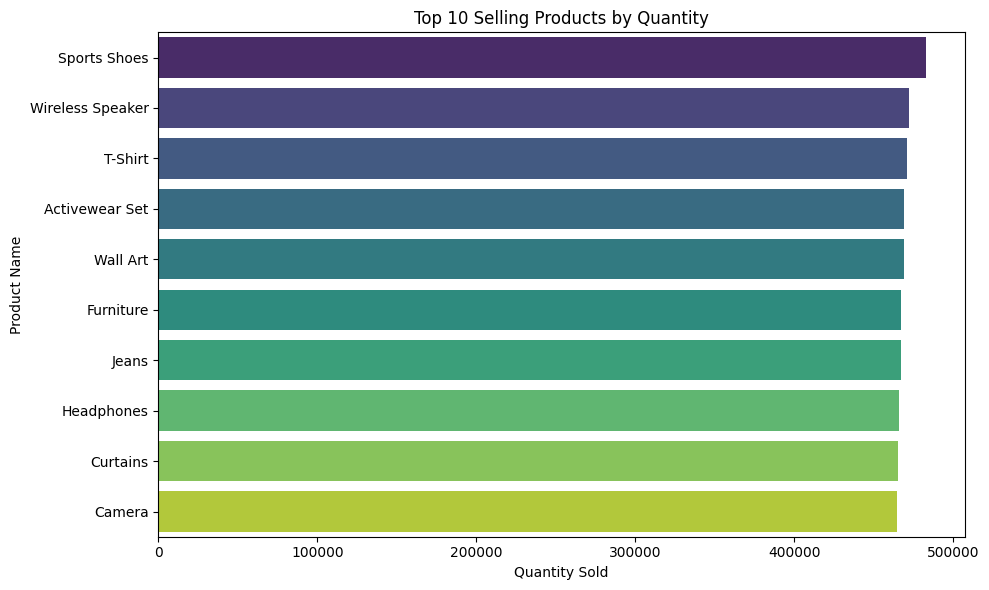

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for Top Selling Products
top_selling_products = pd.DataFrame({
    'product_name_x': ['Sports Shoes', 'Wireless Speaker', 'T-Shirt', 'Activewear Set', 'Wall Art',
                       'Furniture', 'Jeans', 'Headphones', 'Curtains', 'Camera'],
    'quantity_y': [483107, 471944, 470644, 469260, 468840, 467202, 467068, 465772, 465467, 464877]
})

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_selling_products,
    y='product_name_x',  # Product names on the y-axis for a horizontal bar chart
    x='quantity_y',  # Quantity on the x-axis
    palette='viridis'
)

# Titles and labels
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')

# Display the plot
plt.tight_layout()
plt.show()


**High_Value_Segments**

- I suggest the business focuses on these segments for loyalty programs, promotions, or tailored marketing efforts.





**Top_Selling_Products**

- The business must identify trends of popular iteams to help optimize invetory or marketing strategies

#**Calculating Churn Rate**

In [13]:
# Convert the 'order_date' column to datetime format
df_p['order_date'] = pd.to_datetime(df_p['order_date'], format='%d-%m-%Y')

# Find the last purchase date for each customer
last_purchase = df_p.groupby('customer_id')['order_date'].max().reset_index()
last_purchase.columns = ['customer_id', 'last_purchase_date']

# Merge the last purchase date with the customer data
df_c = pd.merge(df_c, last_purchase, on='customer_id', how='left')

# Define a churn period (e.g., 1 year)
cutoff_date = df_p['order_date'].max() - pd.DateOffset(years=1)

# Mark customers who have churned (those who haven't purchased in the last year)
df_c['churned'] = df_c['last_purchase_date'] < cutoff_date

# Calculate the churn rate
total_customers = df_c.shape[0]
churned_customers = df_c['churned'].sum()

churn_rate = (churned_customers / total_customers) * 100
churn_rate



0.0

#**Interpreting Churn_rate**

- Churn rate of 0.0% means that no customers have been inactive for more than a year.

#**Analysing Trands & Patterns**


**Purchase trends over time**

In [14]:
# Extract the month and year from the 'order_date'
df_p['year'] = df_p['order_date'].dt.year
df_p['month'] = df_p['order_date'].dt.month

In [15]:
# Create a 'year-month' column for monthly grouping
df_p['year_month'] = df_p['order_date'].dt.to_period('M')

In [16]:
# Group by 'year-month' to see monthly purchasing trends
monthly_trends = df_p.groupby('year_month').size().reset_index(name='num_purchases')

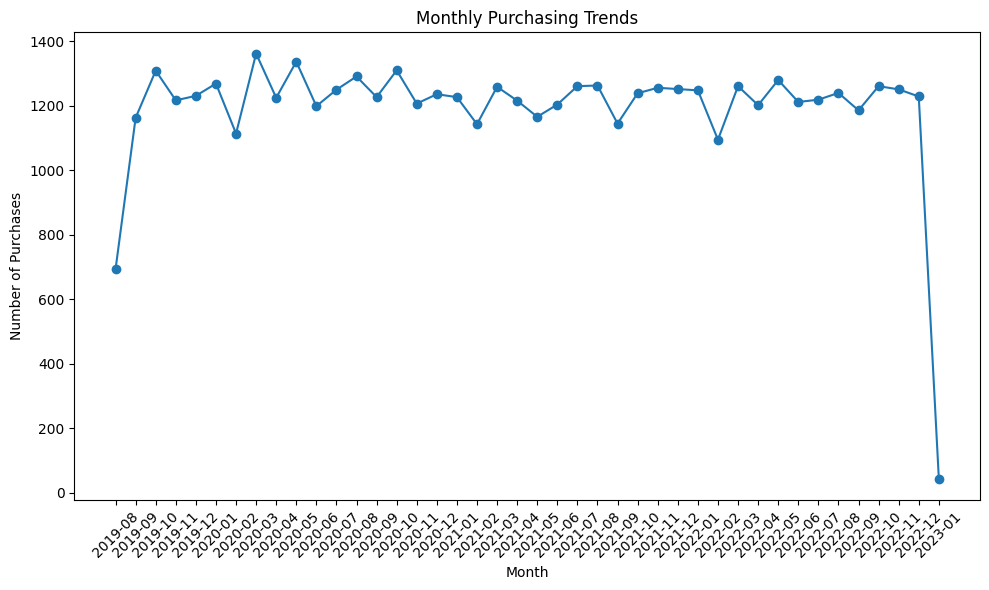

In [17]:
# Plotting monthly purchasing trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['year_month'].astype(str), monthly_trends['num_purchases'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Monthly Purchasing Trends')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

#**Interpretation of the above monthly trend**

- If we focus on the spikes we can see that there are peak times as well as slow times. For example the month of Aug & Jan seem to bee the ones that have significant slow purchasing.
- while Dec & March have the highest peack times.

- We can see that there is consistency in thses patterns meaning the business must know that there is a recurring seasonal demand.

#**Quarterly Purchasing Trends**

In [18]:
# Also group by quarter for quarterly trends
df_p['quarter'] = df_p['order_date'].dt.to_period('Q')
quarterly_trends = df_p.groupby('quarter').size().reset_index(name='num_purchases')

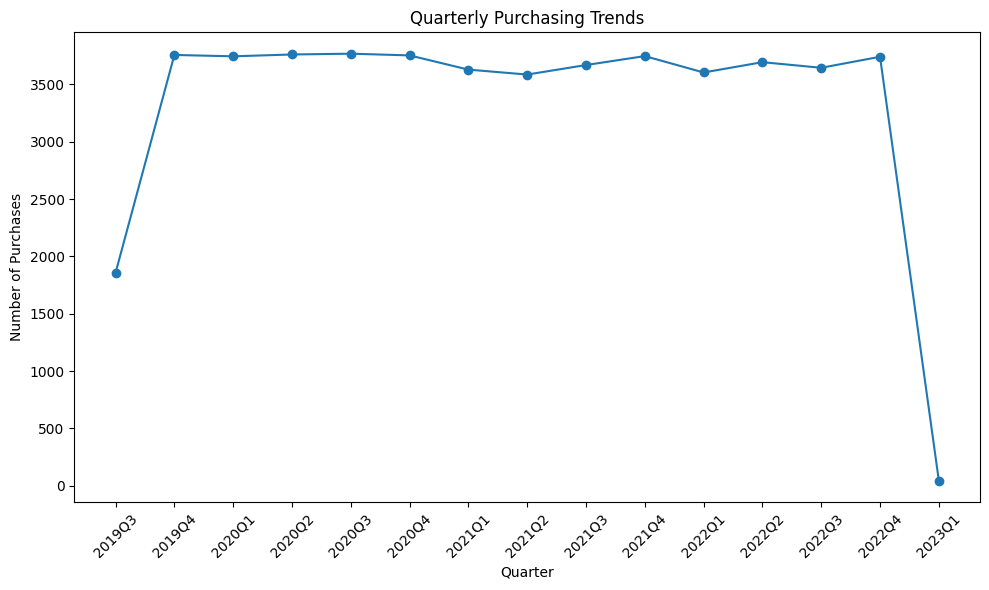

In [28]:
# Plotting quarterly purchasing trends
plt.figure(figsize=(10, 6))
plt.plot(quarterly_trends['quarter'].astype(str), quarterly_trends['num_purchases'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Quarterly Purchasing Trends')
plt.xlabel('Quarter')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

#**Interpreting Quarterly Trends**

- Peaks in Q4 mybe driven by holiday demand
- Drops in Q1 may reflact post holidays


- Yearly Comparison:

- If the quarterly pattern repeats year after year, it could highlight strong seasonal trends. For example, strong Q4s year-over-year would confirm the impact of year-end holidays or major events.
Performance Across Years:

- Check whether there is a steady improvement in sales over quarters each year. This would signal strong performance, especially if the quarterly numbers increase in the same period across years.

#**Further Insights:**
 - Seasonality: If certain months or quarters consistently perform better, consider planning more aggressive marketing strategies, inventory management, or promotional efforts during these periods.

- Off-Season Strategies: If you see clear periods of decline, you might want to explore strategies to boost sales in low-demand periods, like offering discounts or targeting niche markets.

- Impact of Marketing Campaigns: Spikes that don’t align with typical seasonality could be due to marketing efforts or promotions. If available, compare these trends with historical marketing activity to understand cause and effect.

#**Downloading_new_merged_dataset**

In [22]:
#Downloading new dataset
from google.colab import files
import pandas as pd

# Assuming your dataset is in a Pandas DataFrame named 'df':
# Replace 'df' with the actual name of your DataFrame.
merged_data.to_csv('my_dataset.csv', index=False)  # Create the CSV file

files.download('my_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**THE END**